#Optimizing Deep Learning Models for Real-World Data


---

##*Dataset: UCI Forest Covertype*

1. * Importing required tools and libraries
   * Loading Dataset
   * Exploring Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
data=fetch_covtype()
X,y=data.data,data.target - 1 #-1 to shift labels to 0-based indexing .

In [ ]:
print(X.shape)
print(y.shape)

(581012, 54)
(581012,)


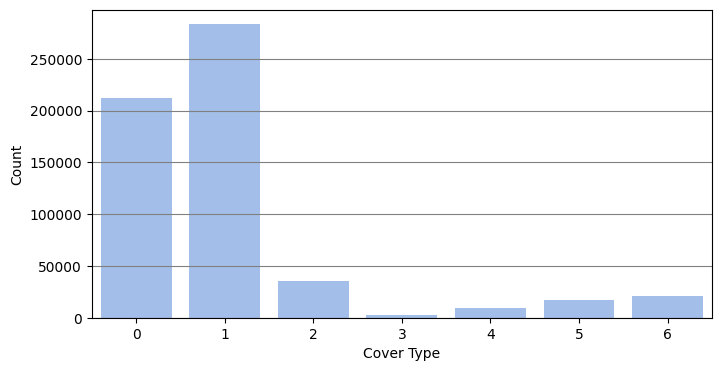

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=y,color='#97BBF4')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.grid(axis='y',color='grey')
plt.show()

In [ ]:
print("\nClass distribution:")
print(pd.Series(y).value_counts().sort_index())


Class distribution:
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
Name: count, dtype: int64




---


2. * Splitting dataset into test and train sets.
  * Scaling the features.
  * One_hot encoding the labels/classes.
---  

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(464809, 54)
(116203, 54)
(116203,)
(464809,)


In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

Define and Train a Baseline MLP Model
---

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
baseline_model=Sequential([Input(shape=(X_train.shape[1],)),
                           Dense(512,activation='relu'),
                           Dense(256,activation='relu'),
                           Dense(7,activation='softmax')])
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
baseline_model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [ ]:
history_baseline_model=baseline_model.fit(X_train,y_train,epochs=20,
                                          validation_split=0.2,
                                          batch_size=256,
                                          verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7366 - loss: 0.6328 - val_accuracy: 0.7963 - val_loss: 0.4731
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8111 - loss: 0.4481 - val_accuracy: 0.8284 - val_loss: 0.4244
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8350 - loss: 0.3986 - val_accuracy: 0.8415 - val_loss: 0.3879
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8472 - loss: 0.3725 - val_accuracy: 0.8527 - val_loss: 0.3606
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8561 - loss: 0.3521 - val_accuracy: 0.8585 - val_loss: 0.3511
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8621 - loss: 0.3384 - val_accuracy: 0.8639 - val_loss: 0.3393
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8666 - loss: 0.3305 - val_accuracy: 0.8722 - val_loss: 0.3183
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8726 -

In [ ]:
def plot_learning_curves(history,title='Model'):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  epochs=range(1,len(acc)+1)

  plt.figure(figsize=(10,5))

  # Accuracy Plot
  plt.subplot(1,2,1)
  plt.plot(epochs,acc,'b-',label='Training Accuracy')
  plt.plot(epochs,val_acc,'r--',label='Validation Accuracy')
  plt.title(f'{title} _ Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  #Loss Plot
  plt.subplot(1,2,2)
  plt.plot(epochs,loss,'b-',label='Training Loss')
  plt.plot(epochs,val_loss,'r--',label='Validation Loss')
  plt.title(f'{title} _ Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()



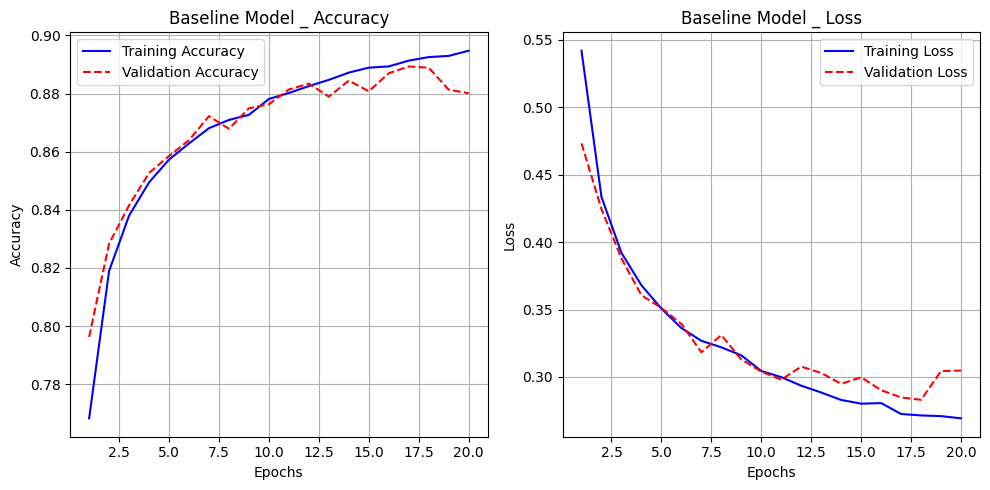

In [ ]:
plot_learning_curves(history_baseline_model,title='Baseline Model')

* The training accuracy improves steadily, reaching around 90%, while the validation accuracy fluctuates a bit more, peaking around 88% before slightly declining. This could indicate some overfitting.

* Both training loss and validation loss decrease over time, which is generally good. The training loss follows a smooth decline, but the validation loss has some fluctuations before stabilizing around 0.30.

---

In [ ]:
# Evaluation
loss_bl,acc_bl=baseline_model.evaluate(X_test,y_test)
print(f'Test Loss: {100*loss_bl:.2f}%')
print(f'Test Accuracy: {100*acc_bl:.2f}%')

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8791 - loss: 0.3080
Test Loss: 30.84%
Test Accuracy: 87.95%


* 86% Accuracy is a good performance, will further aim to imporve it through regularization and optimizing techniques.

---
**TASKS**

---
## 1. Neural Network Architecture

**Deeper or wider configurations.**


In [ ]:
Deep_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(512,activation='relu'),
                     Dense(256,activation='relu'),
                     Dense(256,activation='relu'),
                     Dense(128,activation='relu'),
                     Dense(128,activation='relu'),
                     Dense(7,activation='softmax')])
Deep_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,591 (1.05 MB)

 Trainable params: 275,591 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Deep_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_deep_mlp=Deep_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                              validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7202 - loss: 0.6786 - val_accuracy: 0.7845 - val_loss: 0.4975
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.7972 - loss: 0.4834 - val_accuracy: 0.8136 - val_loss: 0.4519
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.8148 - loss: 0.4489 - val_accuracy: 0.8186 - val_loss: 0.4371
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8259 - loss: 0.4270 - val_accuracy: 0.8316 - val_loss: 0.4154
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.8352 - loss: 0.4047 - val_accuracy: 0.8360 - val_loss: 0.4080
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8379 - loss: 0.4069 - val_accuracy: 0.8492 - val_loss: 0.3744
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8451 - loss: 0.3908 - val_accuracy: 0.8495 - val_loss: 0.3822
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.8507 -

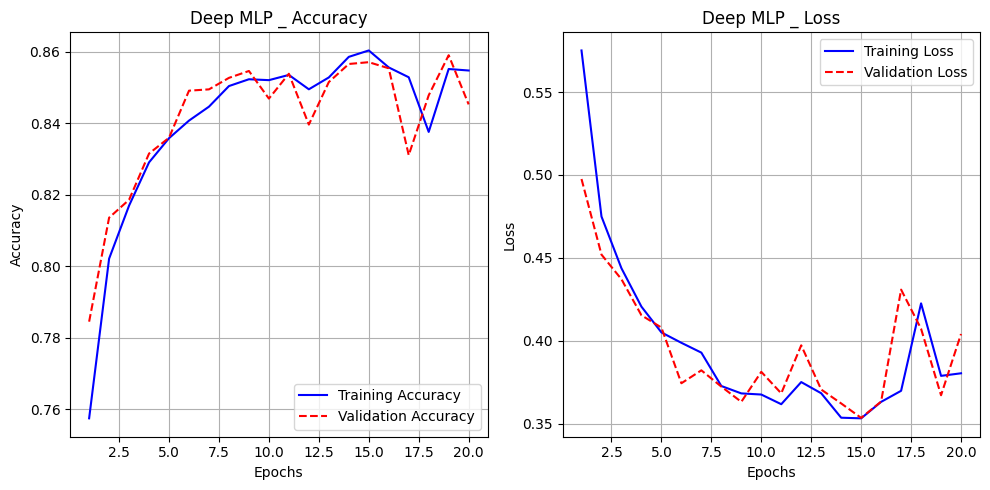

In [ ]:
plot_learning_curves(history_deep_mlp,title='Deep MLP')

* Both training and validation accuracy show steady improvement, reaching around 86% and 85%, respectively.

* The training loss smoothly decreases, while validation loss fluctuates slightly but generally moves downward to around 0.40. These fluctuations suggest slight overfitting but nothing drastic yet.

---
* 	Experiment with different activation functions (e.g., ReLU, LeakyReLU, SELU).

**LeakyReLU Version:**

In [ ]:
from tensorflow.keras.layers import LeakyReLU

leaky_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                      Dense(512,activation=LeakyReLU(alpha=0.01)),
                      Dense(256,activation=LeakyReLU(alpha=0.01)),
                      Dense(7,activation='softmax')])

leaky_mlp.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
leaky_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_leaky_mlp=leaky_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.7370 - loss: 0.6298 - val_accuracy: 0.7925 - val_loss: 0.5096
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8102 - loss: 0.4522 - val_accuracy: 0.8332 - val_loss: 0.4055
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8367 - loss: 0.3912 - val_accuracy: 0.8406 - val_loss: 0.3791
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8497 - loss: 0.3669 - val_accuracy: 0.8486 - val_loss: 0.3917
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8579 - loss: 0.3504 - val_accuracy: 0.8639 - val_loss: 0.3275
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8647 - loss: 0.3376 - val_accuracy: 0.8671 - val_loss: 0.3233
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8726 - loss: 0.3128 - val_accuracy: 0.8656 - val_loss: 0.3315
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8599 -

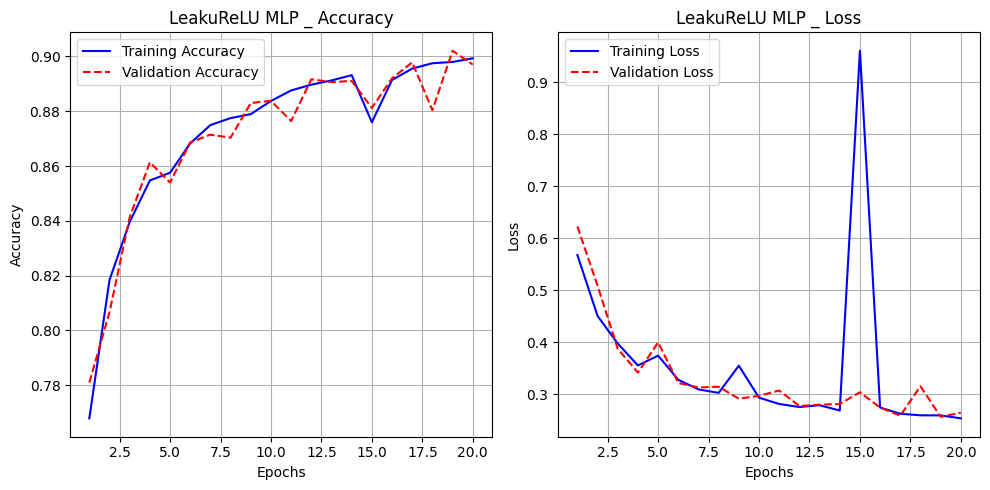

In [ ]:
plot_learning_curves(history_leaky_mlp,title='LeakuReLU MLP')

* Training Accuracy improves steadily from 77% to ~90.5%

* Validation Accuracy follows very closely — reaching ~90%

**SELU Version**

In [ ]:
from tensorflow.keras.initializers import lecun_normal
from tensorflow.keras.layers import AlphaDropout


SELU_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(512,activation='selu',kernel_initializer=lecun_normal()),
                     AlphaDropout(0.1),
                     Dense(256,activation='selu',kernel_initializer=lecun_normal()),
                     AlphaDropout(0.1),
                     Dense(7,activation='softmax')])
SELU_mlp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout (AlphaDropout)    │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_1 (AlphaDropout)  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
SELU_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_SELU_mlp=SELU_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6850 - loss: 0.8636 - val_accuracy: 0.7148 - val_loss: 0.7707
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7293 - loss: 0.6464 - val_accuracy: 0.7391 - val_loss: 0.6801
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.7486 - loss: 0.6005 - val_accuracy: 0.7875 - val_loss: 0.5196
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7572 - loss: 0.5812 - val_accuracy: 0.7436 - val_loss: 0.5992
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.7650 - loss: 0.5637 - val_accuracy: 0.7878 - val_loss: 0.5536
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7705 - loss: 0.5568 - val_accuracy: 0.7961 - val_loss: 0.5298
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.7745 - loss: 0.5469 - val_accuracy: 0.7695 - val_loss: 0.5539
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7756 -

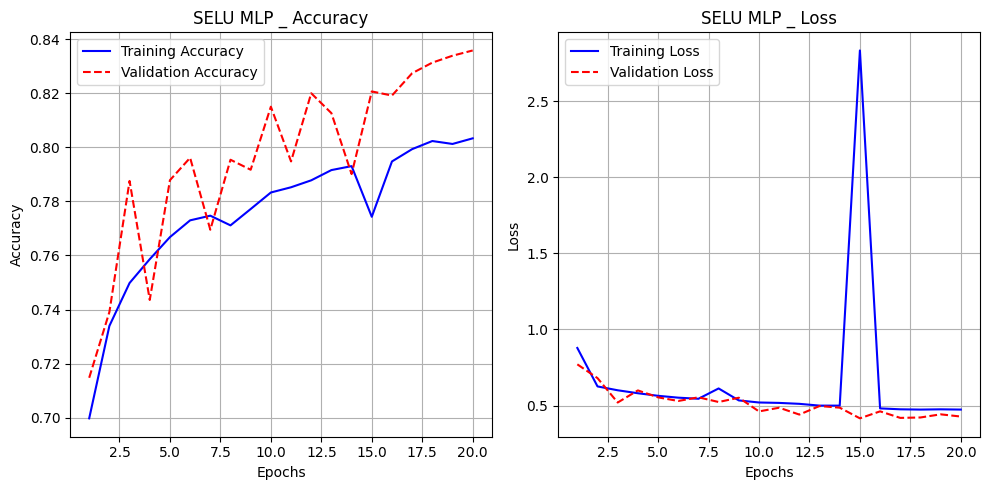

In [ ]:
plot_learning_curves(history_SELU_mlp,title='SELU MLP')

*  Training accuracy and validation accuracy  both show improvement, but validation accuracy peaks slightly higher at  around 83%.

* Training loss drops consistently, but there’s a sharp spike at epoch 13 , possibly indicating unstable learning behavior.

**Batch Normalization**

In [ ]:
from tensorflow.keras.layers import BatchNormalization

BN_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                   Dense(512,activation='relu'),
                   BatchNormalization(),
                   Dense(256,activation='relu'),
                   BatchNormalization(),
                   Dense(7,activation='softmax')])
BN_mlp.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,359 (642.03 KB)

 Trainable params: 162,823 (636.03 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
BN_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_BN_mlp=BN_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7391 - loss: 0.6428 - val_accuracy: 0.8171 - val_loss: 0.4431
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8264 - loss: 0.4134 - val_accuracy: 0.8446 - val_loss: 0.3750
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8513 - loss: 0.3565 - val_accuracy: 0.8592 - val_loss: 0.3396
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.8662 - loss: 0.3230 - val_accuracy: 0.8715 - val_loss: 0.3187
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8766 - loss: 0.3025 - val_accuracy: 0.8753 - val_loss: 0.3042
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8829 - loss: 0.2854 - val_accuracy: 0.8867 - val_loss: 0.2802
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8878 - loss: 0.2733 - val_accuracy: 0.8940 - val_loss: 0.2634
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8936 -

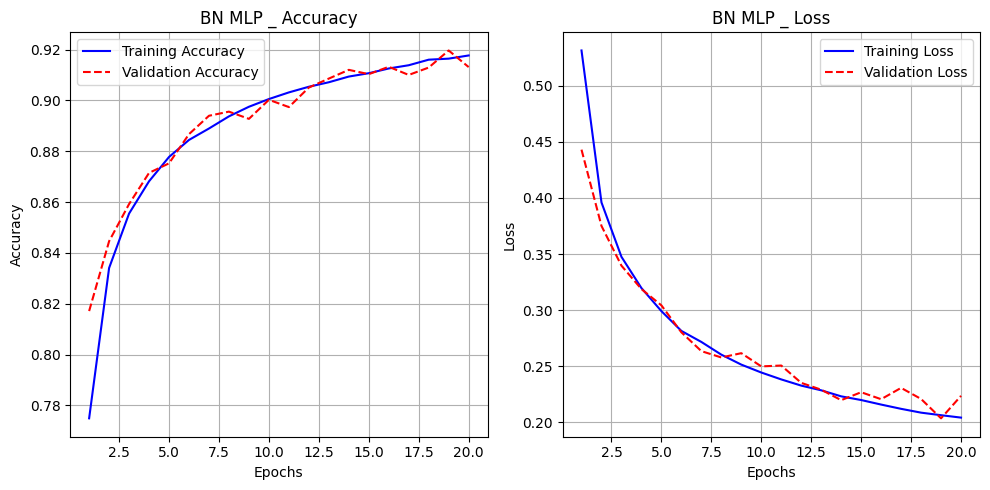

In [ ]:
plot_learning_curves(history_BN_mlp,title='BN MLP')


* Training accuracy and validation accuracy both are improving steadily.
* Both training and validation loss decreased over time, starting around 0.52 and dropping to ~0.20 by epoch 20.



---

***Neural Network Architecture — Design Explanation***

1.**Deeper Network** : Modified the baseline model by increasing the number of neurons(depth) and the layers(width),to encourage model to learn more complex patterns and capture more variations.

2.**LeakyReLU**: Experimented using LeakyReLU to avoid risk of dying neurons problem,alpha=0.01 is a commonly used option to provide stable gradients.

3.**SELU** : Used SELU to maintain a self_normalizing network.AlphaDropout was required to preserve the properties.

4.**Batch Normalization** : Applied Batch normalization to normalize output of each layer to avoid/reduce covariate shift.

---


##2.Regularization Techniques

**Dropout Regularization**

In [ ]:
from tensorflow.keras.layers import Dropout

dropout_model=Sequential([Input(shape=(X_train.shape[1],)),
                          Dense(512,activation='relu'),
                          Dropout(0.3),
                          Dense(256,activation='relu'),
                          Dropout(0.3),
                          Dense(7,activation='softmax')])
dropout_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
dropout_model.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_Dropout_model=dropout_model.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7094 - loss: 0.6983 - val_accuracy: 0.7646 - val_loss: 0.5477
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7535 - loss: 0.5857 - val_accuracy: 0.7835 - val_loss: 0.5065
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7658 - loss: 0.5614 - val_accuracy: 0.8063 - val_loss: 0.4650
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7752 - loss: 0.5493 - val_accuracy: 0.8087 - val_loss: 0.4521
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7811 - loss: 0.5341 - val_accuracy: 0.8122 - val_loss: 0.4528
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.7873 - loss: 0.5229 - val_accuracy: 0.8245 - val_loss: 0.4321
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7916 - loss: 0.5153 - val_accuracy: 0.8274 - val_loss: 0.4270
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7926 -

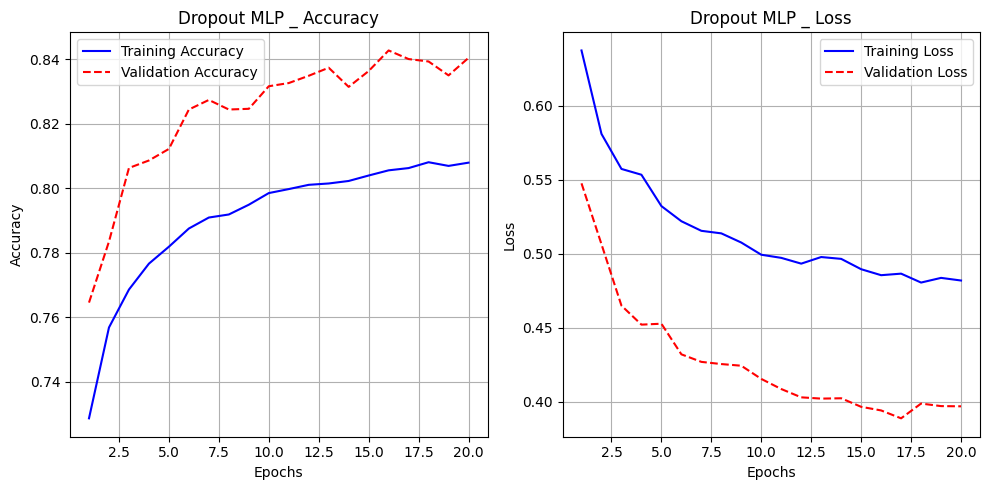

In [ ]:
plot_learning_curves(history_Dropout_model,title='Dropout MLP')

*  The validation accuracy starts off higher than the training accuracy  blue  and continues improving, reaching around 84% by epoch 20. This suggests dropout is helping regularization by preventing overfitting.

* Both training and validation loss decrease steadily, converging around 0.40 by epoch 20. Unlike previous models, the loss curves are more stable.

**L2 Regularization**

In [ ]:
from tensorflow.keras.regularizers import l2

L2_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                   Dense(512,activation='relu',kernel_regularizer=l2(0.001)),
                   Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
                   Dense(7,activation='softmax')])
L2_mlp.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
L2_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_L2_mlp=L2_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7233 - loss: 0.7771 - val_accuracy: 0.7617 - val_loss: 0.6189
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7628 - loss: 0.6103 - val_accuracy: 0.7781 - val_loss: 0.5804
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7751 - loss: 0.5833 - val_accuracy: 0.7811 - val_loss: 0.5754
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7787 - loss: 0.5758 - val_accuracy: 0.7783 - val_loss: 0.5709
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7791 - loss: 0.5717 - val_accuracy: 0.7822 - val_loss: 0.5634
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.7809 - loss: 0.5664 - val_accuracy: 0.7776 - val_loss: 0.5734
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.7800 - loss: 0.5675 - val_accuracy: 0.7751 - val_loss: 0.5810
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7828 -

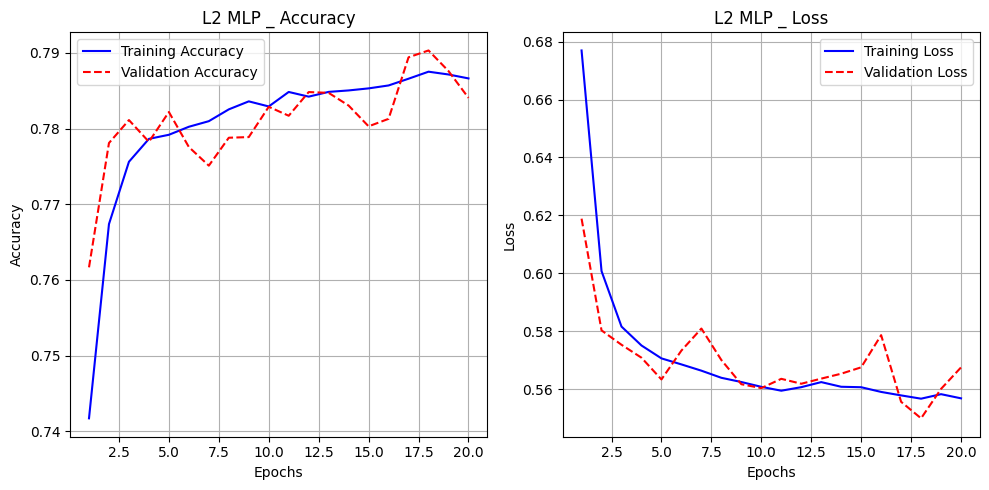

In [ ]:
plot_learning_curves(history_L2_mlp,title='L2 MLP')

* Both training and validation accuracy steadily improve, reaching around 79% by epoch 20. The close alignment suggests that L2 regularization is effectively reducing overfitting.
* Training loss  steadily decreases from 0.68 to ~0.56, while validation loss  follows a similar pattern

**Batch Normalization + Dropout**

In [ ]:
B_Drop_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                       Dense(512,activation='relu'),
                       BatchNormalization(),
                       Dropout(0.3),
                       Dense(256,activation='relu'),
                       BatchNormalization(),
                       Dropout(0.3),
                       Dense(7,activation='softmax')])
B_Drop_mlp.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,359 (642.03 KB)

 Trainable params: 162,823 (636.03 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
B_Drop_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_B_Drop=B_Drop_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8654 - loss: 0.3243 - val_accuracy: 0.8931 - val_loss: 0.2719
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.8664 - loss: 0.3223 - val_accuracy: 0.8972 - val_loss: 0.2591
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.8660 - loss: 0.3209 - val_accuracy: 0.8976 - val_loss: 0.2598
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8678 - loss: 0.3199 - val_accuracy: 0.8948 - val_loss: 0.2602
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8686 - loss: 0.3168 - val_accuracy: 0.9010 - val_loss: 0.2568
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8706 - loss: 0.3134 - val_accuracy: 0.8894 - val_loss: 0.2715
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8711 - loss: 0.3123 - val_accuracy: 0.9008 - val_loss: 0.2473
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8728 -

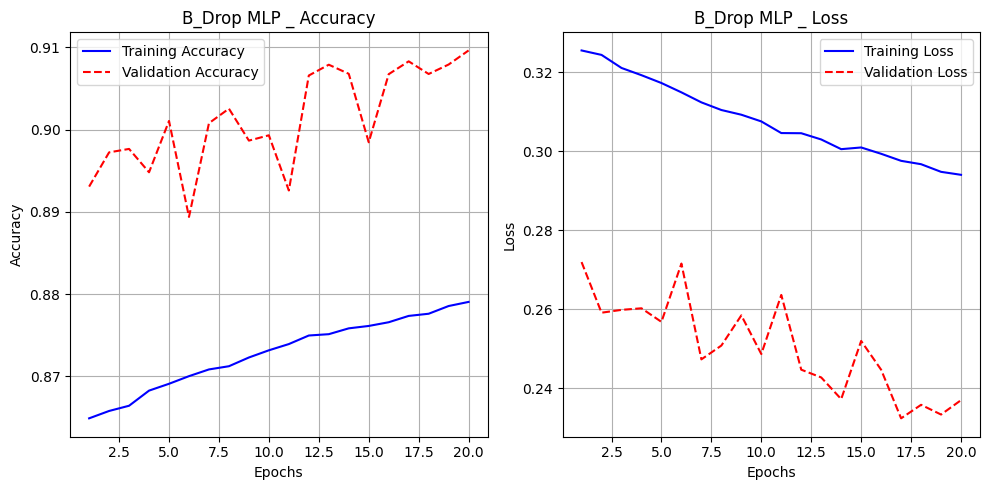

In [ ]:
plot_learning_curves(history_B_Drop,title='B_Drop MLP')

* Training accuracy  shows a slight upward trend, stabilizing around 88%, while validation accuracy  fluctuates between 89% and 91%.

* Training loss  decreases steadily from 0.32 to ~0.29, while validation loss  oscillates between 0.24 and 0.26.



---

## 3.Optimizer and Learning Rate Strategy

* Trying multiple optimizers

**RMSprop**

In [ ]:
Rms_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(512,activation='relu'),
                     Dense(256,activation='relu'),
                     Dense(7,activation='softmax')])
Rms_mlp.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
Rms_mlp.compile(optimizer=RMSprop(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_Rms_mlp=Rms_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7287 - loss: 0.7220 - val_accuracy: 0.8088 - val_loss: 0.4640
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8205 - loss: 0.4368 - val_accuracy: 0.8254 - val_loss: 0.4420
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8371 - loss: 0.4081 - val_accuracy: 0.8424 - val_loss: 0.4034
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8484 - loss: 0.3882 - val_accuracy: 0.8361 - val_loss: 0.4299
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8541 - loss: 0.3796 - val_accuracy: 0.8576 - val_loss: 0.3658
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8571 - loss: 0.3741 - val_accuracy: 0.8472 - val_loss: 0.4042
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8608 - loss: 0.3717 - val_accuracy: 0.8561 - val_loss: 0.3844
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8607 -

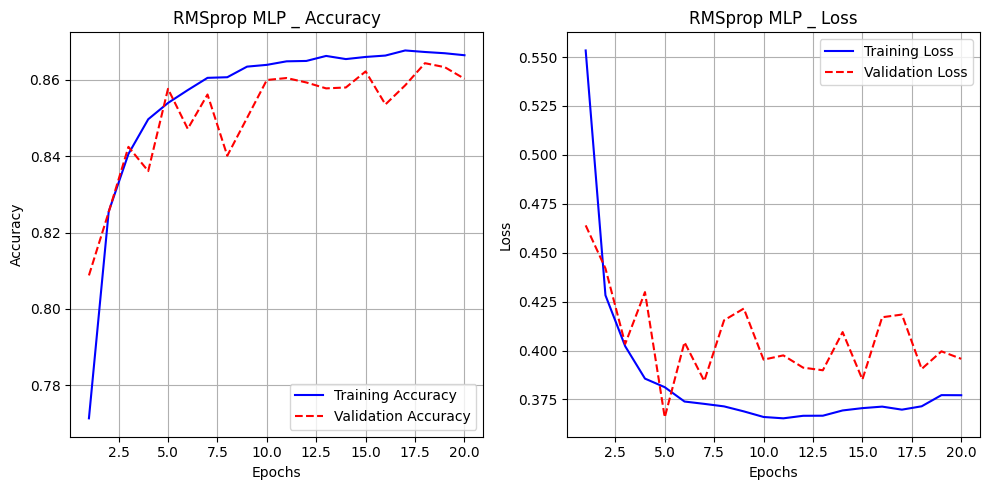

In [ ]:
plot_learning_curves(history_Rms_mlp,title='RMSprop MLP')

* Training loss  decreases steadily from 0.32 to ~0.29, while validation loss  oscillates between 0.24 and 0.26.
* Training loss decreases sharply at first and then stabilizes, while validation loss fluctuates around 0.40–0.45.

**SGD**

In [ ]:
SGD_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(512,activation='relu'),
                     Dense(256,activation='relu'),
                     Dense(7,activation='softmax')])
SGD_mlp.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
SGD_mlp.compile(optimizer=SGD(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_SGD_mlp=SGD_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6285 - loss: 0.9963 - val_accuracy: 0.7268 - val_loss: 0.6696
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7310 - loss: 0.6552 - val_accuracy: 0.7392 - val_loss: 0.6262
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7429 - loss: 0.6167 - val_accuracy: 0.7472 - val_loss: 0.6018
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7495 - loss: 0.5941 - val_accuracy: 0.7517 - val_loss: 0.5866
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7562 - loss: 0.5782 - val_accuracy: 0.7586 - val_loss: 0.5696
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7629 - loss: 0.5618 - val_accuracy: 0.7655 - val_loss: 0.5553
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7682 - loss: 0.5502 - val_accuracy: 0.7718 - val_loss: 0.5426
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7739 - lo

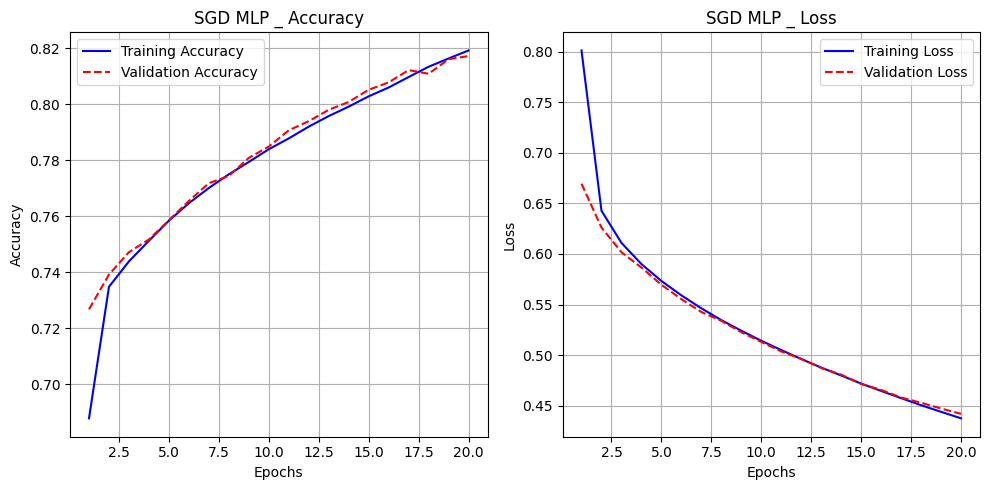

In [ ]:
plot_learning_curves(history_SGD_mlp,title='SGD MLP')

* Training accuracy and validation accuracy both improve steadily, reaching ~82% by epoch 20.
* Both training and validation loss decline smoothly, starting from ~0.80 and dropping to ~0.40. The lack of sharp fluctuations suggests stable convergence.

**Reduce Learning Rate on Plateau**

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [ ]:
Reduced_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                       Dense(512,activation='relu'),
                       Dense(256,activation='relu'),
                       Dense(7,activation='softmax')])
Reduced_mlp.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Reduced_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_Reduced_mlp=Reduced_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1,callbacks=[reduce_lr])

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7345 - loss: 0.6267 - val_accuracy: 0.7964 - val_loss: 0.4795 - learning_rate: 0.0100
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8094 - loss: 0.4549 - val_accuracy: 0.8281 - val_loss: 0.4144 - learning_rate: 0.0100
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8321 - loss: 0.4105 - val_accuracy: 0.8416 - val_loss: 0.3882 - learning_rate: 0.0100
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8458 - loss: 0.3768 - val_accuracy: 0.8519 - val_loss: 0.3708 - learning_rate: 0.0100
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8562 - loss: 0.3531 - val_accuracy: 0.8540 - val_loss: 0.3588 - learning_rate: 0.0100
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8617 - loss: 0.3403 - val_accuracy: 0.8649 - val_loss: 0.3390 - learning_rate: 0.0100
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accura

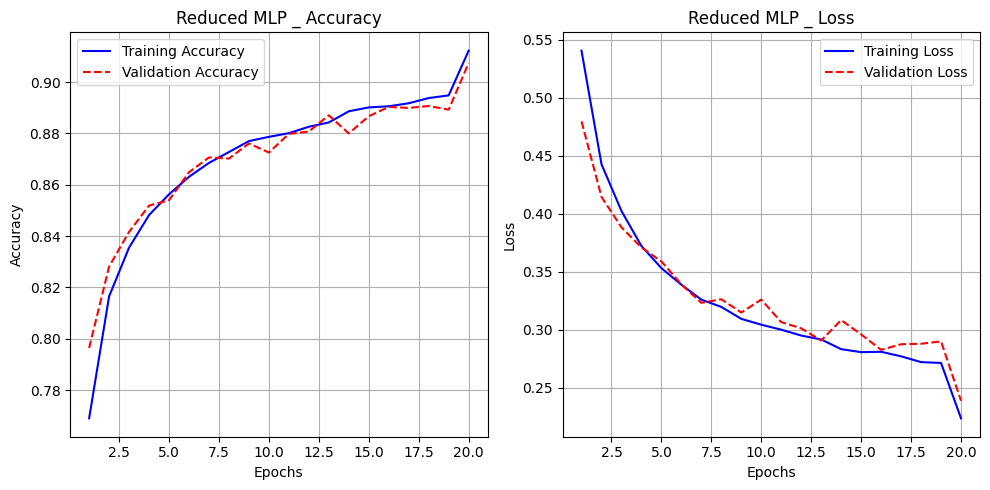

In [ ]:
plot_learning_curves(history_Reduced_mlp,title='Reduced MLP')


* Training accuracy  and validation accuracy both improve steadily, reaching ~92% by epoch 20.
* Training loss steadily decreases from 0.55 to ~0.20, while validation loss follows a similar trend.

---

##4.	Training Management

**Early Stopping**


In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

In [ ]:
Early_stop_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(512,activation='relu'),
                     Dense(256,activation='relu'),
                     Dense(7,activation='softmax')])
Early_stop_mlp.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,287 (630.03 KB)

 Trainable params: 161,287 (630.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Early_stop_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_Early_stop_mlp=Early_stop_mlp.fit(X_train,y_train,epochs=20,batch_size=256,
                                validation_split=0.2,verbose=1,callbacks=[early_stop])

Epoch 1/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7363 - loss: 0.6298 - val_accuracy: 0.8012 - val_loss: 0.4835
Epoch 2/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8093 - loss: 0.4558 - val_accuracy: 0.8199 - val_loss: 0.4332
Epoch 3/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8327 - loss: 0.4066 - val_accuracy: 0.8433 - val_loss: 0.3836
Epoch 4/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8454 - loss: 0.3762 - val_accuracy: 0.8496 - val_loss: 0.3730
Epoch 5/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8561 - loss: 0.3543 - val_accuracy: 0.8606 - val_loss: 0.3472
Epoch 6/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8612 - loss: 0.3413 - val_accuracy: 0.8643 - val_loss: 0.3359
Epoch 7/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8684 - loss: 0.3254 - val_accuracy: 0.8704 - val_loss: 0.3208
Epoch 8/20
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8726 -

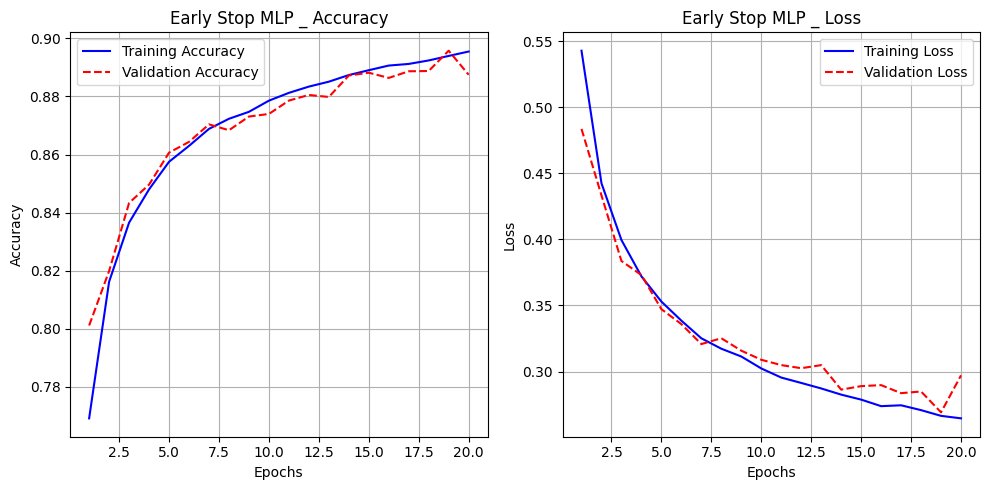

In [ ]:
plot_learning_curves(history_Early_stop_mlp,title='Early Stop MLP')

* Training accuracy  reaches ~90%, while validation accuracy closely follows at ~89% before dipping slightly near the end.

* Training loss steadily declines to ~0.25, while validation loss similarly drops but shows a slight upward trend near the final epochs.

##Model Evaluation

---

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

* Accuracy

In [ ]:
models={'Deep MLP': Deep_mlp,
        'LeakyRelu MLP': leaky_mlp,
        'SELU MLP': SELU_mlp,
        'Batch Normalization': BN_mlp,
        'Dropout Regularization': dropout_model,
        'Drop out + Batch Normalization': B_Drop_mlp,
        'L2_Regularization': L2_mlp,
        'RMSprop Optimizer': Rms_mlp,
        'SGD Optimizer': SGD_mlp,
        'Reduced LR':Reduced_mlp,
        'Early stop MLP':Early_stop_mlp}
for name, model in models.items():
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'\n{name} Model Test Accuracy: {100* test_acc:.4f}%')
    print('--------------------------------------------------')


Deep MLP Model Test Accuracy: 84.5400%
--------------------------------------------------

LeakyRelu MLP Model Test Accuracy: 89.5519%
--------------------------------------------------

SELU MLP Model Test Accuracy: 83.6295%
--------------------------------------------------

Batch Normalization Model Test Accuracy: 91.3032%
--------------------------------------------------

Dropout Regularization Model Test Accuracy: 84.0572%
--------------------------------------------------

Drop out + Batch Normalization Model Test Accuracy: 90.9366%
--------------------------------------------------

L2_Regularization Model Test Accuracy: 78.5444%
--------------------------------------------------

RMSprop Optimizer Model Test Accuracy: 85.8171%
--------------------------------------------------

SGD Optimizer Model Test Accuracy: 81.8025%
--------------------------------------------------

Reduced LR Model Test Accuracy: 90.6844%
--------------------------------------------------

Early stop M

* Classification Report

In [ ]:
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"\nClassification Report for {name}")
    y_pred_probs = model.predict(X_test)

    y_pred = np.argmax(y_pred_probs, axis=1)


    print(classification_report(y_test, y_pred))


Classification Report for Deep MLP
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     42368
           1       0.83      0.93      0.87     56661
           2       0.89      0.64      0.74      7151
           3       0.94      0.41      0.57       549
           4       0.78      0.30      0.44      1899
           5       0.59      0.71      0.65      3473
           6       0.86      0.89      0.88      4102

    accuracy                           0.85    116203
   macro avg       0.83      0.67      0.71    116203
weighted avg       0.85      0.85      0.84    116203


Classification Report for LeakyRelu MLP
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     42368
           1       0.91      0.92      0.92     56661
           2       0.94      0.76      0.84      7151
           3       0.87

* Macro and Weighted F1 score

In [ ]:
from sklearn.metrics import f1_score
summary = []

for name, model in models.items():
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    summary.append((name, macro_f1, weighted_f1))

# Print summary table
print("\n Summary of F1-scores:")
print(f"{'Model':<25}{'Macro F1':<15}{'Weighted F1'}")
for name, macro, weighted in summary:
    print(f"{name:<25}{macro:<15.4f}{weighted:.4f}")


3632/3632 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step

 Summary of F1-scores:
Model                    Macro F1       Weighted F1
Deep MLP                 0.7142         0.8420
LeakyRelu MLP            0.8219         0.8957
SELU MLP                 0.6651         0.8310
Batch Normalization      0.8714         0.9123
Dropout Regularization   0.6333         0.8341
Drop out + Batch Normalization0.8556         0.9087
L2_Regularization        0.6383         0.7806
RMSprop Optimizer        0.7506         0.8585
SGD Optimizer            0.6397         0.8115
Reduced LR             

* Confusion Matrix

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


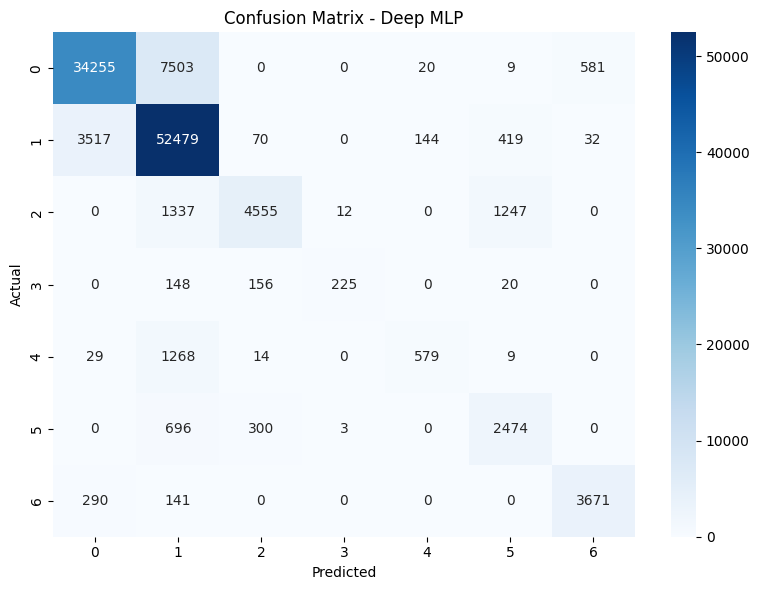

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


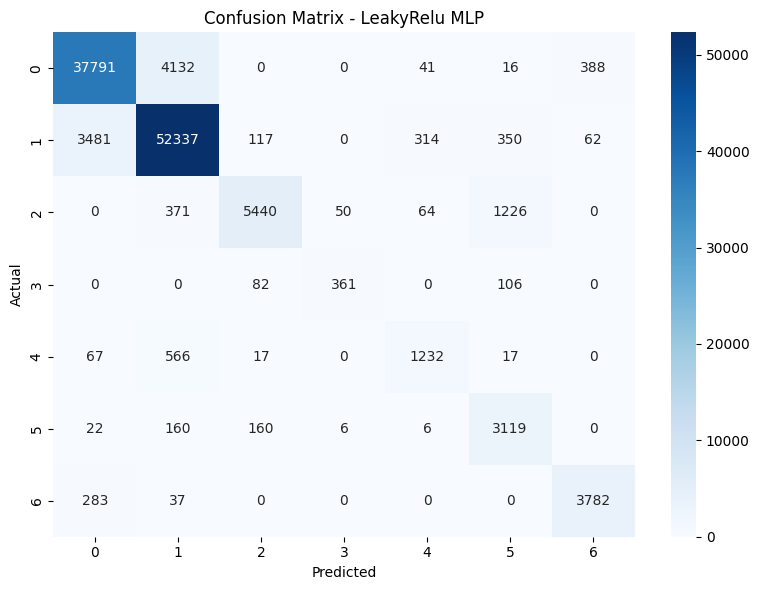

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


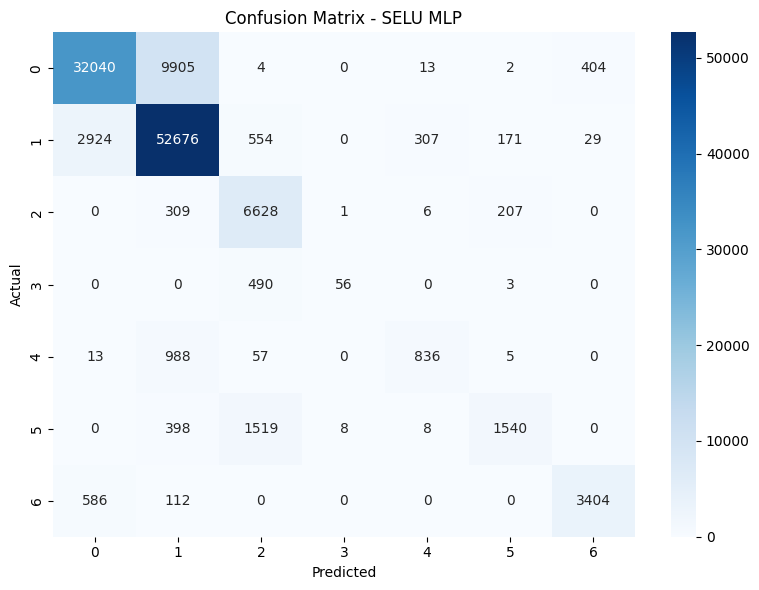

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


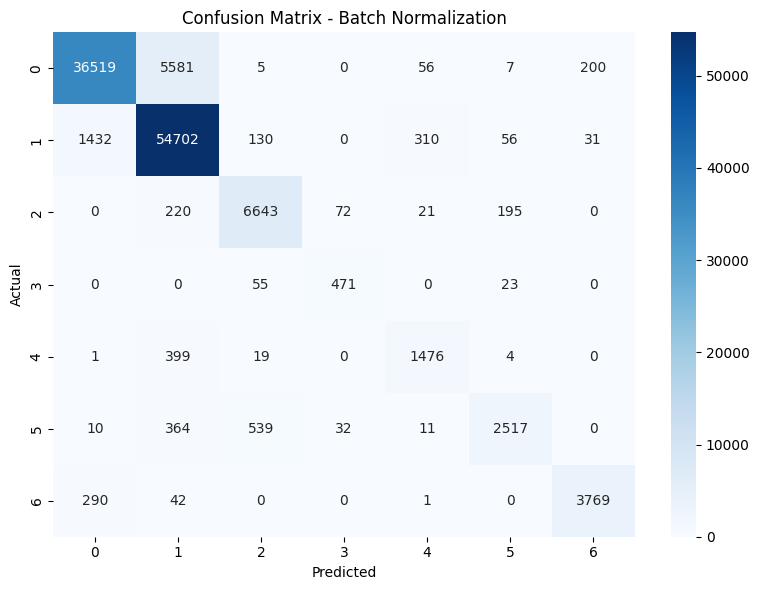

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


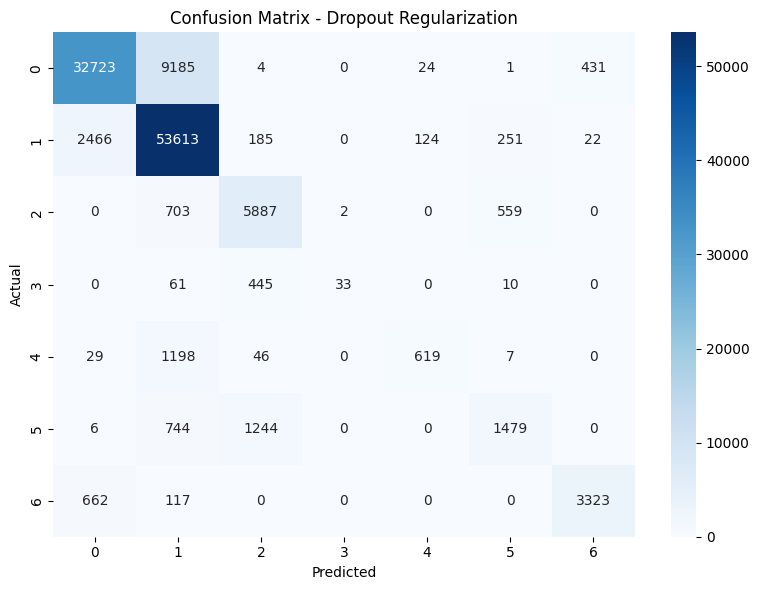

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


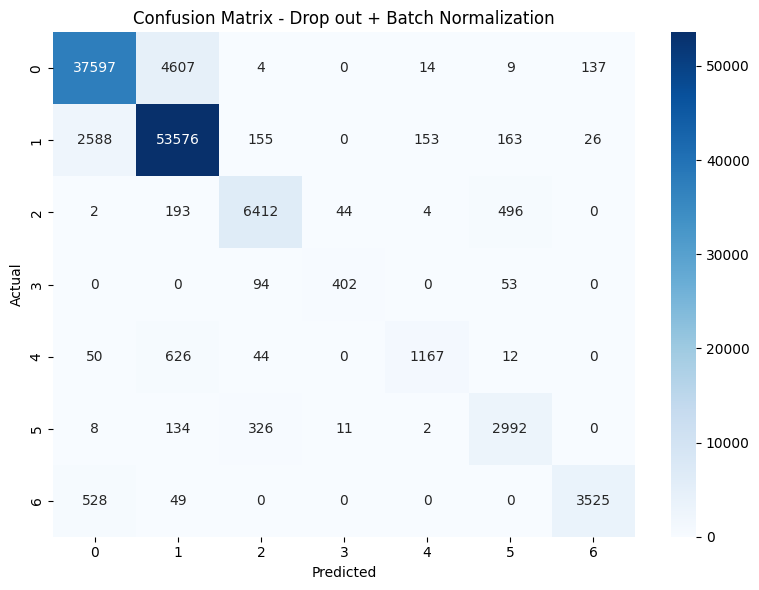

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


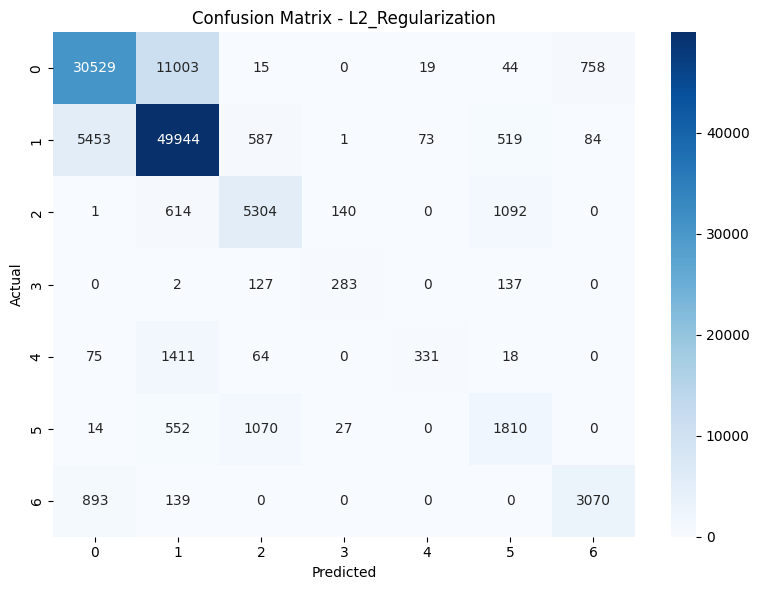

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


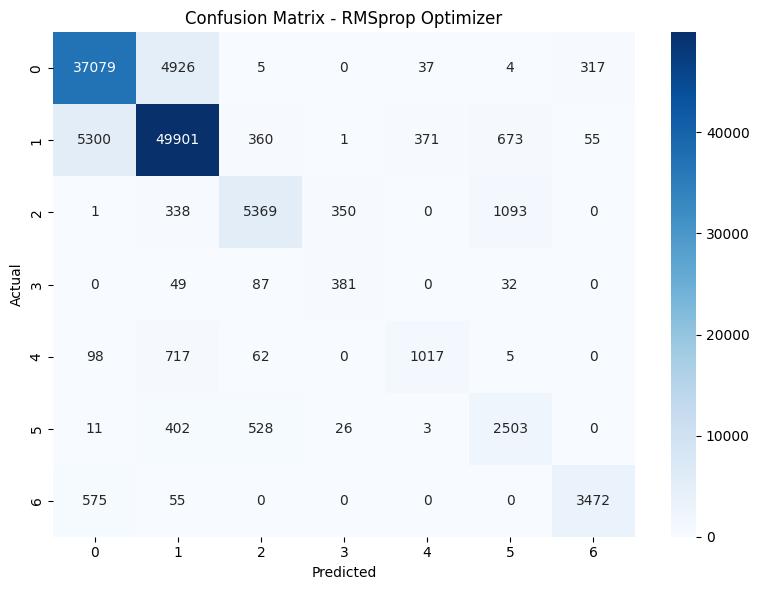

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


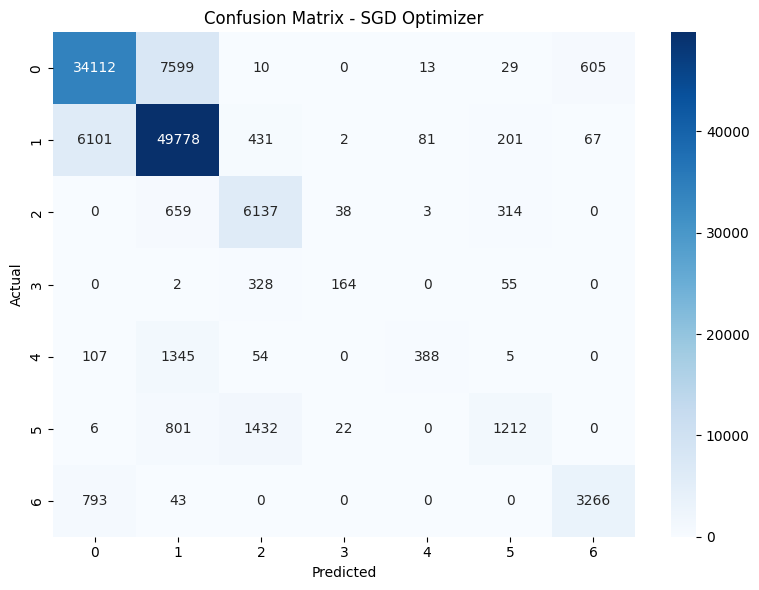

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


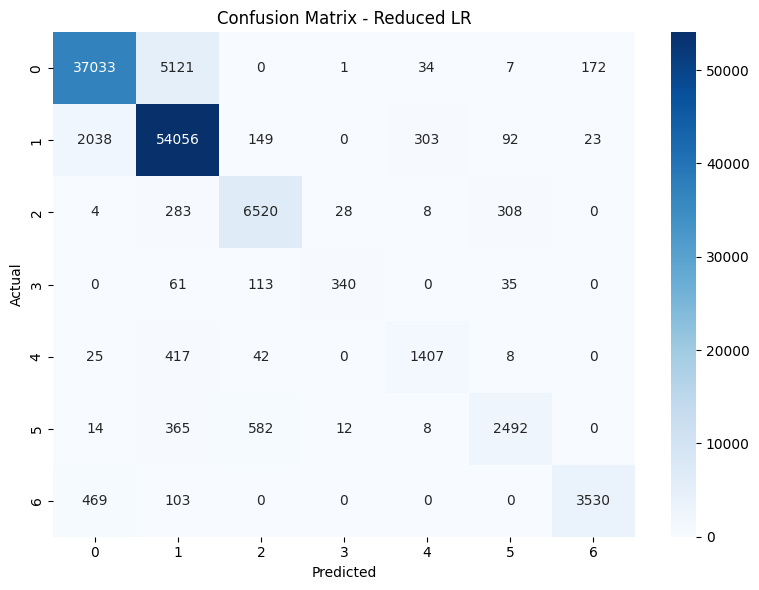

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


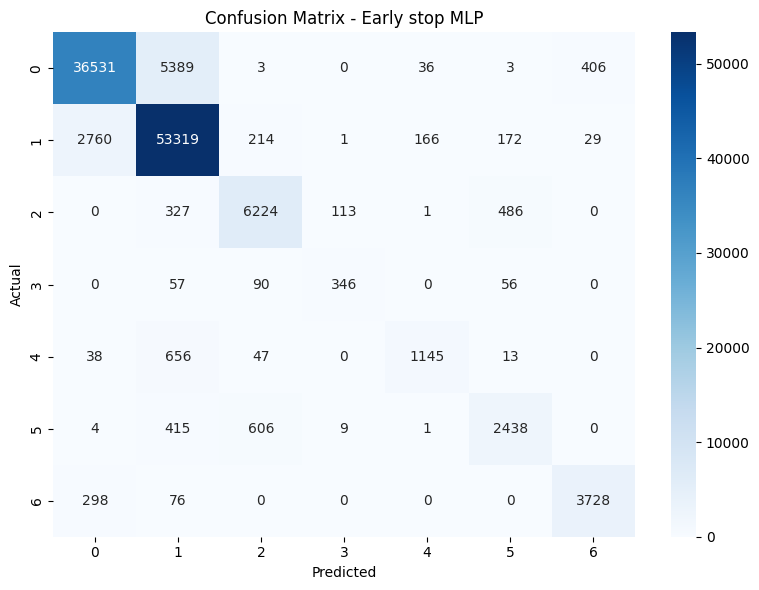

In [ ]:
from sklearn.metrics import confusion_matrix
for name, model in models.items():

    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)


    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


#Ensemble Method

**Random Forest Classifier**




In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

In [ ]:
rf_acc = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {rf_acc*100:.2f}%")

Random Forest Accuracy: 95.33%


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_rf_pred,digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.9630    0.9417    0.9523     42368
           1     0.9485    0.9726    0.9604     56661
           2     0.9395    0.9592    0.9492      7151
           3     0.9181    0.8579    0.8870       549
           4     0.9518    0.7688    0.8506      1899
           5     0.9278    0.8914    0.9093      3473
           6     0.9731    0.9451    0.9589      4102

    accuracy                         0.9533    116203
   macro avg     0.9460    0.9053    0.9240    116203
weighted avg     0.9534    0.9533    0.9530    116203



In [ ]:
f1_weighted_rf = f1_score(y_test, y_rf_pred, average='weighted')
f1_macro_rf = f1_score(y_test, y_rf_pred, average='macro')

print(f"Random Forest Weighted F1-score: {f1_weighted_rf:.4f}")
print(f"Random Forest Macro F1-score: {f1_macro_rf:.4f}")


Random Forest Weighted F1-score: 0.9530
Random Forest Macro F1-score: 0.9240


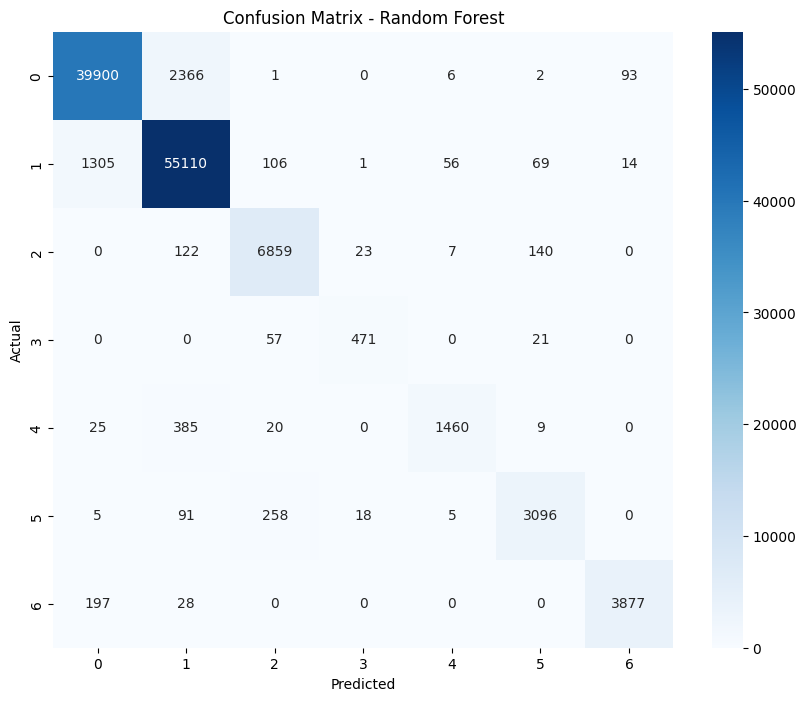

In [ ]:
cm_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Final Evaluation


---
**Batch Normalization** alone achieved the highest accuracy (91.30%), showing strong regularization and stable learning.

**Combining Dropout + BatchNorm** also performed well (90.94%), confirming the value of hybrid regularization techniques.

**Reduced LR** helped improve final accuracy, likely by allowing fine-tuning at later epochs.

**LeakyReLU and EarlyStopping** also helped achieve high accuracy, preventing vanishing gradients and overfitting, respectively.

---

## Comparison with Ensemble Method

 **Random Forest model** achieved an impressive 95.33% test accuracy, significantly outperforming all other deep learning (MLP) models.
 Random Forest performs better than MLPs on structured datasets and is robust to outliers and irrelevant features without much preprocessing. Where-as MLPs require careful feature scaling, regularization, and architecture tuning.